In [46]:
import pcDataLoader as pc
import pandas as pd
import os
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [47]:
home = os.path.expanduser('~')

In [48]:
path = home + "/Documents/PhysiBoSSv2/output"
path

'/home/marco/Documents/PhysiBoSSv2/output'

In [49]:
file = "/output00000000.xml"
path_file = path + file
mcds = pc.pyMCDS(path_file)
mcds.data["metadata"]["current_time"]

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_attached_cells_graph.txt
done!


0.0

In [50]:
phase_dict = {}

phase_dict[4] = "G0G1_phase"
phase_dict[10] = "S_phase"
phase_dict[11] = "G2M_phase"
phase_dict[100] = "apoptotic"



In [51]:
mcds.get_cell_df()

,attachment_elastic_constant,attachment_rate,attack_rates,calcification_rate,calcified_fraction,cell_BM_adhesion_strength,cell_BM_repulsion_strength,cell_adhesion_affinities,cell_cell_adhesion_strength,cell_cell_repulsion_strength,...,total_attack_time,total_volume,transformation_rates,uptake_rates,velocity_x,velocity_y,velocity_z,voxel_i,voxel_j,voxel_k
ID,,,,,,,,,,,,,,,,,,,,,
0.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,24,24,0
1.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,25,24,0
2.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,24,24,0
3.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,25,25,0
4.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,25,24,0
5.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,24,25,0
6.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,24,24,0
7.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,26,25,0
8.0,0.01,0.0,0.0,0.0,0.0,4.0,100.0,1.0,0.4,10.0,...,0.0,2494.0,0.0,0.0,0.0,0.0,0.0,26,24,0


In [52]:
xml_files = []


for folder, cose, files in os.walk(path):
    for name in files:
        if name.endswith(".xml") & name.startswith("output"):
            xml_files.append(name)
            
xml_files.sort()
xml_files

['output00000000.xml',
 'output00000001.xml',
 'output00000002.xml',
 'output00000003.xml',
 'output00000004.xml',
 'output00000005.xml',
 'output00000006.xml',
 'output00000007.xml',
 'output00000008.xml',
 'output00000009.xml',
 'output00000010.xml',
 'output00000011.xml',
 'output00000012.xml',
 'output00000013.xml',
 'output00000014.xml',
 'output00000015.xml',
 'output00000016.xml',
 'output00000017.xml',
 'output00000018.xml',
 'output00000019.xml',
 'output00000020.xml',
 'output00000021.xml',
 'output00000022.xml',
 'output00000023.xml',
 'output00000024.xml',
 'output00000025.xml',
 'output00000026.xml',
 'output00000027.xml',
 'output00000028.xml',
 'output00000029.xml',
 'output00000030.xml',
 'output00000031.xml',
 'output00000032.xml',
 'output00000033.xml',
 'output00000034.xml',
 'output00000035.xml',
 'output00000036.xml',
 'output00000037.xml',
 'output00000038.xml',
 'output00000039.xml',
 'output00000040.xml',
 'output00000041.xml',
 'output00000042.xml',
 'output000

In [53]:
full_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])    

for file in xml_files:
    
    mcds = pc.pyMCDS(file, path);
    
    time = mcds.data["metadata"]["current_time"]
    
    for i in mcds.data["discrete_cells"]["data"]["ID"]:
        ID = i
        index = np.where(mcds.data["discrete_cells"]["data"]["ID"] == ID)
        phase = phase_dict[int(mcds.data["discrete_cells"]["data"]["current_phase"][index])]
        phase_duration = int(mcds.data["discrete_cells"]["data"]["elapsed_time_in_phase"][index][0])
        new_entry = pd.Series({"time_step":time, "ID":ID,
                     "phase":phase, "duration":phase_duration})
        full_data = pd.concat([full_data, new_entry.to_frame().T], ignore_index=True)



reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000000_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000001.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000001_microenvironment0.mat
parsing: substrate data
working on d

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000014_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000014_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000014_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000015.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000015_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000015_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000015_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000015_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000032_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000032_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000032_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000033.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000033_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000033_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000033_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000033_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000050_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000050_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000050_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000051.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000051_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000051_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000051_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000051_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000068_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000068_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000068_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000069.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000069_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000069_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000069_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000069_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000086_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000086_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000086_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000087.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000087_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000087_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000087_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000087_attached_cells_graph.txt
done!
reading: /home/marco/Docum

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000104.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000104_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000104_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000104_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000104_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000105.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000105_microenvironment0.mat
parsing: substrate data
working on d

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000121.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000121_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000121_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000121_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000121_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000122.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000122_microenvironment0.mat
parsing: substrate data
working on d

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000136_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000136_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000136_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000137.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000137_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000137_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000137_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000137_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output0000

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000152_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000152_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000153.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000153_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000153_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000153_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000153_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000154.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000168_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000168_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000168_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000169.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000169_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000169_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000169_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000169_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000184_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000184_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000184_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000185.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000185_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000185_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000185_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000185_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000200_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000200_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000200_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000201.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000201_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000201_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000201_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000201_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000216_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000216_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000216_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000217.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000217_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000217_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000217_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000217_attached_cells_graph.txt
done!
reading: /home/marco/Docum

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000232.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000232_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000232_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000232_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000232_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000233.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000233_microenvironment0.mat
parsing: substrate data
working on d

reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000247_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000247_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000247_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000247_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000248.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000248_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000248_cells.mat
working on graph data

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000262.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000262_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000262_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000262_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000262_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000263.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000263_microenvironment0.mat
parsing: substrate data
working on d

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000275_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000275_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000275_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000276.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000276_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000276_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000276_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000276_attached_cells_graph.txt
done!
reading: /home/marco/Docum

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000289.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000289_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000289_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000289_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000289_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000290.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000290_microenvironment0.mat
parsing: substrate data
working on d

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000302_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000302_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000302_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000303.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000303_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000303_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000303_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000303_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000315_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000315_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000315_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000316.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000316_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000316_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000316_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000316_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000329_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000329_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000329_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000330.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000330_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000330_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000330_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000330_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000342_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000342_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000342_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000343.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000343_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000343_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000343_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000343_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000355_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000355_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000355_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000356.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000356_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000356_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000356_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000356_attached_cells_graph.txt
done!
reading: /home/marco/Docum

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000373.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000373_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000373_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000373_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000373_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000374.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000374_microenvironment0.mat
parsing: substrate data
working on d

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000386.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000386_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000386_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000386_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000386_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000387.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000387_microenvironment0.mat
parsing: substrate data
working on d

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000402.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000402_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000402_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000402_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000402_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000403.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000403_microenvironment0.mat
parsing: substrate data
working on d

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000418_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000418_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000418_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000419.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000419_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000419_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000419_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000419_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000434_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000434_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000434_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000435.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000435_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000435_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000435_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000435_attached_cells_graph.txt
done!
reading: /home/marco/Docum

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000449_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000449_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000449_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000450.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000450_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000450_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000450_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000450_attached_cells_graph.txt
done!
reading: /home/marco/Docum

reading: /home/marco/Documents/PhysiBoSSv2/output/output00000465.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000465_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000465_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000465_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000465_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000466.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000466_microenvironment0.mat
parsing: substrate data
working on d

working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000479_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000479_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000479_attached_cells_graph.txt
done!
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000480.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000480_microenvironment0.mat
parsing: substrate data
working on discrete cell data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000480_cells.mat
working on graph data ...
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000480_cell_neighbor_graph.txt
reading: /home/marco/Documents/PhysiBoSSv2/output/output00000480_attached_cells_graph.txt
done!


In [54]:
def filter_duration(full_data, phase, ID):
    df = full_data[(full_data.phase == phase) & (full_data.ID == ID)]
    df2 = df.copy()

    for i in range(1, len(df["duration"])):
        index_prev = df["duration"].index[i - 1]
        index = df["duration"].index[i]
        if df["duration"][index] > df["duration"][index_prev]:
            df2.drop([index_prev], inplace=True)
    return df2

In [55]:
IDs = full_data.ID.drop_duplicates()
phases = ["G0G1_phase", "S_phase", "G2M_phase"]

filtered_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])

for name in IDs:
    for phase in phases:
        a = filter_duration(full_data, phase, name)
        filtered_data = pd.concat([filtered_data, a], ignore_index=True)

AVERAGE DURATION OF EACH CELL CYCLE PHASE


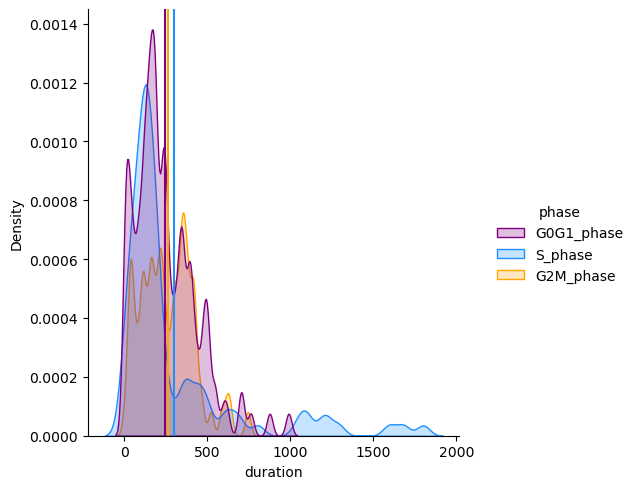

In [56]:
palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [57]:
filtered_data_duration = filtered_data[filtered_data['duration'].abs() < 1000]

AVERAGE DURATION OF EACH CELL CYCLE PHASE


/tmp/ipykernel_10028/543291753.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
/tmp/ipykernel_10028/543291753.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
/tmp/ipykernel_10028/543291753.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.axvline(x=filtered_data_duration[(filtered_data.phase == "S_phase")]["duration"].mean(),


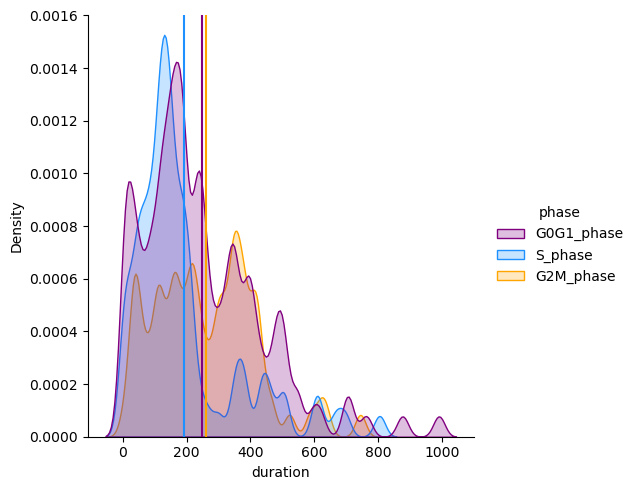

In [58]:
palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data_duration, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

EVOLUTION OF THE CELL CYCLE DURING THE SIMULATION


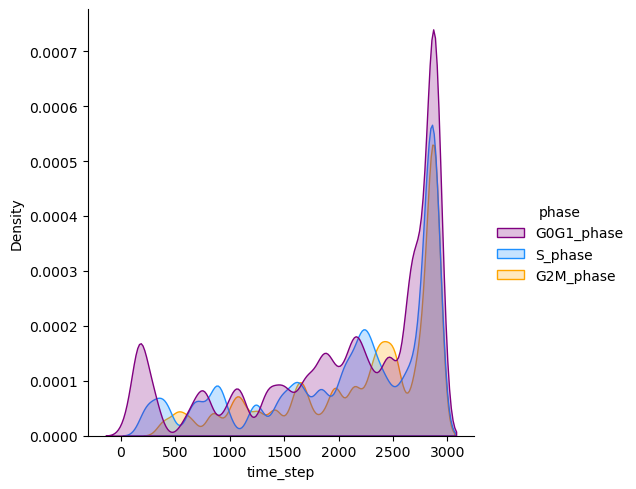

In [59]:
print("EVOLUTION OF THE CELL CYCLE DURING THE SIMULATION")
sb.displot(filtered_data, x="time_step", kind="kde", hue='phase', fill=True, bw_adjust=.20, palette=palette)

Average duration G0G1 phase:  248.2204724409449  minutes
Average duration S phase:  302.1063829787234  minutes
Average duration G2M phase:  260.8421052631579  minutes


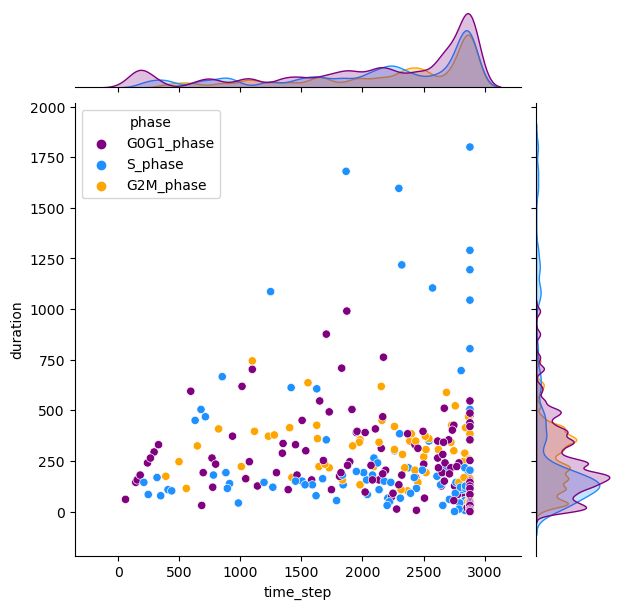

In [60]:
g = sb.JointGrid()
y, x, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

Average duration G0G1 phase:  248.2204724409449  minutes
Average duration S phase:  302.1063829787234  minutes
Average duration G2M phase:  260.8421052631579  minutes


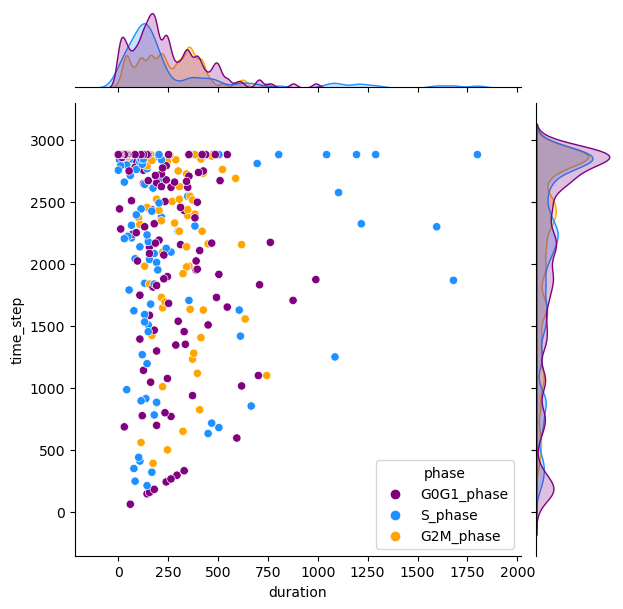

In [61]:
g = sb.JointGrid()
x, y, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

Average duration for each cell cycle phase, detail


<Axes: xlabel='phase', ylabel='duration'>

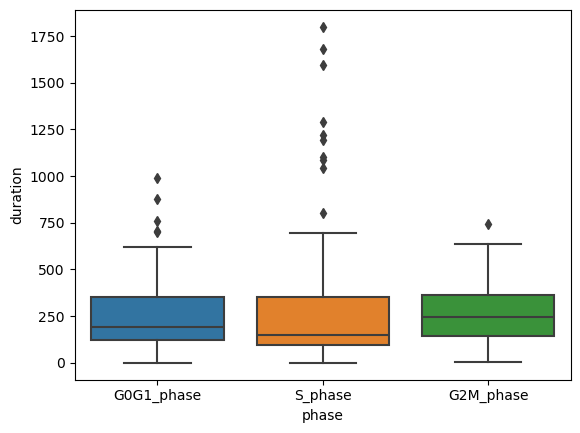

In [62]:
print("Average duration for each cell cycle phase, detail")
sb.boxplot(data=filtered_data, x='phase', y="duration")

<Axes: xlabel='time_step', ylabel='phase'>

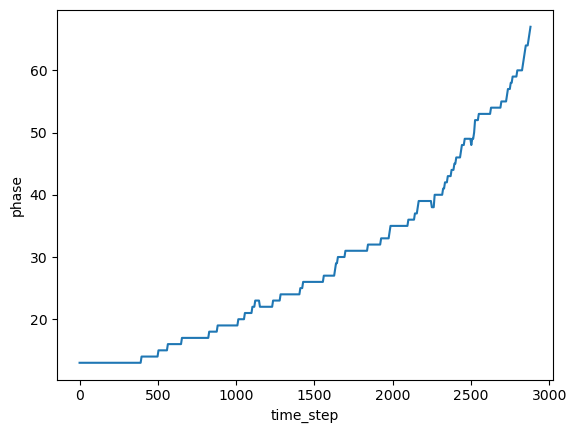

In [63]:
df1 = full_data.groupby('time_step').agg({'phase':'count'})

sb.lineplot(data=df1, x="time_step", y="phase")

In [64]:
data = df1.copy()

Known initial number of cells (N0): 13
Estimated growth rate (r): 0.0004486943906161276 per time unit
Average Division Time (cell cycle duration): 1544.8091062786539 time units


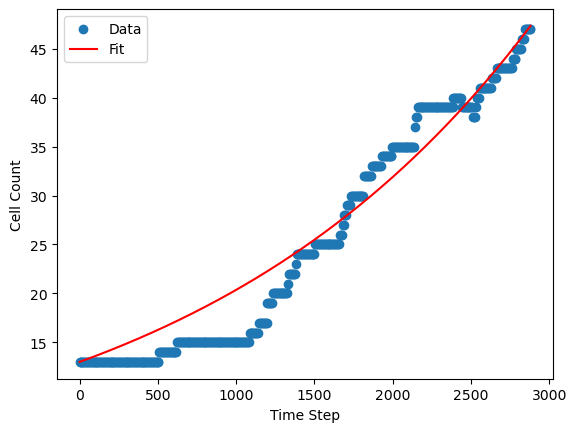

In [44]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

N0 = data["phase"][0]

# Exponential growth model
def exp_growth_model(t, r):
    return N0 * np.exp(r * t)

# Fit the model to the data
popt, pcov = curve_fit(exp_growth_model, data.index, data['phase'], p0=[0.01])

# Use the optimized parameters to calculate the fitted values
fitted_values = exp_growth_model(data.index, *popt)

# Calculate R^2 using the r2_score function from sklearn.metrics
R_squared = r2_score(data['phase'], fitted_values)

# Extract the fitted parameter (only r in this case)
r_fitted = popt[0]

# Calculate the average division time based on the fitted growth rate
average_division_time = np.log(2) / r_fitted

print(f"Known initial number of cells (N0): {N0}")
print(f"Estimated growth rate (r): {r_fitted} per time unit")
print(f"Average Division Time (cell cycle duration): {average_division_time} time units")

# Plot the data and the fit
plt.scatter(data.index, data['phase'], label='Data')
plt.plot(data.index, exp_growth_model(data.index, r_fitted), label='Fit', color='red')
plt.xlabel('Time Step')
plt.ylabel('Cell Count')
plt.legend()
plt.show()

In [45]:
print(R_squared)

0.9427407373364198


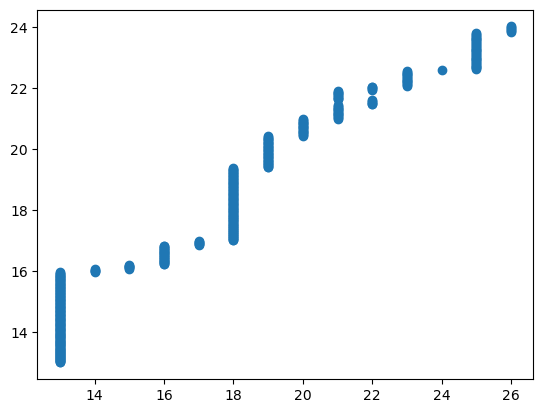

In [22]:
plt.scatter(data["phase"], fitted_values)

In [24]:
# Known values
desired_cell_cycle_duration_hours = 24  # hours
observed_average_cell_cycle_duration_hours = 54.15  # hours
current_scaling_factor = 40  

# Compute the correction factor
correction_factor = desired_cell_cycle_duration_hours / observed_average_cell_cycle_duration_hours

# Apply the correction factor to the current scaling factor
corrected_scaling_factor = current_scaling_factor * correction_factor

print(f"Correction Factor: {correction_factor}")
print(f"Corrected Scaling Factor: {corrected_scaling_factor}")

Correction Factor: 0.44321329639889195
Corrected Scaling Factor: 17.72853185595568


<Axes: xlabel='time_step', ylabel='counts'>

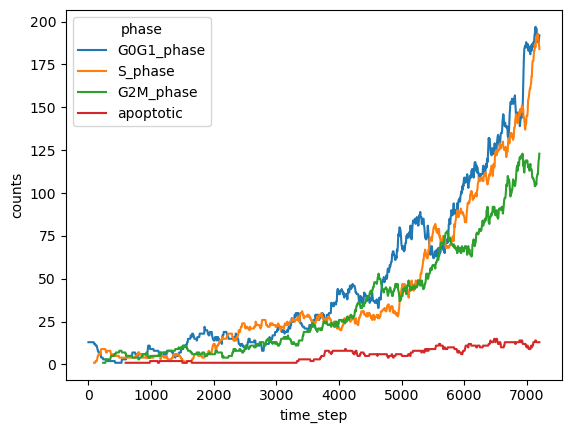

In [21]:
df2 = full_data.groupby(['time_step','phase'])['phase'].count().reset_index(name='counts')

sb.lineplot(data=df2, x="time_step", y="counts", hue="phase")

# PLK1 KNOCK-OUT ANALYSIS

In [22]:
path = home + "/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout"

xml_files = []


for folder, cose, files in os.walk(path):
    for name in files:
        if name.endswith(".xml") & name.startswith("output"):
            xml_files.append(name)
            
xml_files.sort()
xml_files

['output00000000.xml',
 'output00000001.xml',
 'output00000002.xml',
 'output00000003.xml',
 'output00000004.xml',
 'output00000005.xml',
 'output00000006.xml',
 'output00000007.xml',
 'output00000008.xml',
 'output00000009.xml',
 'output00000010.xml',
 'output00000011.xml',
 'output00000012.xml',
 'output00000013.xml',
 'output00000014.xml',
 'output00000015.xml',
 'output00000016.xml',
 'output00000017.xml',
 'output00000018.xml',
 'output00000019.xml',
 'output00000020.xml',
 'output00000021.xml',
 'output00000022.xml',
 'output00000023.xml',
 'output00000024.xml',
 'output00000025.xml',
 'output00000026.xml',
 'output00000027.xml',
 'output00000028.xml',
 'output00000029.xml',
 'output00000030.xml',
 'output00000031.xml',
 'output00000032.xml',
 'output00000033.xml',
 'output00000034.xml',
 'output00000035.xml',
 'output00000036.xml',
 'output00000037.xml',
 'output00000038.xml',
 'output00000039.xml',
 'output00000040.xml',
 'output00000041.xml',
 'output00000042.xml',
 'output000

In [23]:
full_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])    

for file in xml_files:
    
    mcds = pc.pyMCDS(file, path)
    
    time = mcds.data["metadata"]["current_time"]
    
    for i in mcds.data["discrete_cells"]["ID"]:
        ID = i
        index = np.where(mcds.data["discrete_cells"]["ID"] == ID)
        phase = phase_dict[int(mcds.data["discrete_cells"]["current_phase"][index])]
        phase_duration = int(mcds.data["discrete_cells"]["elapsed_time_in_phase"][index][0])
        new_entry = pd.Series({"time_step":time, "ID":ID,
                     "phase":phase, "duration":phase_duration})
        full_data = pd.concat([full_data, new_entry.to_frame().T], ignore_index=True)

reading: /home/marco/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout/output00000000.xml
working on metadata ...
working on mesh data ...
reading: /home/marco/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout/initial_mesh0.mat
working on microenvironment data ...
reading: /home/marco/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout/output00000000_microenvironment0.mat
parsing: oxygen data
working on discrete cell data ...
reading: /home/marco/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout/output00000000_cells.mat
working on graph data ...


FileNotFoundError: Error @ pyMCDS._read_xml : no such file or directory: /home/marco/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout/output00000000_cell_neighbor_graph.txt
referenced in: /home/marco/Documents/PhD/github/private_repo/PhysiBoSS/output_plk1_knockout/output00000000.xml.

In [ ]:
IDs = full_data.ID.drop_duplicates()
phases = ["G0G1_phase", "S_phase", "G2M_phase"]

filtered_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])

for name in IDs:
    for phase in phases:
        a = filter_duration(full_data, phase, name)
        filtered_data = pd.concat([filtered_data, a], ignore_index=True)

In [ ]:
palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [ ]:
filtered_data_duration = filtered_data[filtered_data['duration'].abs() < 1000]

palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data_duration, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [ ]:
print("EVOLUTION OF THE CELL CYCLE DURING THE SIMULATION")
sb.displot(filtered_data, x="time_step", kind="kde", hue='phase', fill=True, bw_adjust=.20, palette=palette)

In [ ]:
g = sb.JointGrid()
y, x, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

In [ ]:
g = sb.JointGrid()
x, y, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

In [ ]:
print("Average duration for each cell cycle phase, detail")
sb.boxplot(data=filtered_data, x='phase', y="duration")

In [ ]:
df1 = full_data.groupby('time_step').agg({'phase':'count'})

sb.lineplot(data=df1, x="time_step", y="phase")

In [ ]:
df2 = full_data.groupby(['time_step','phase'])['phase'].count().reset_index(name='counts')

sb.lineplot(data=df2, x="time_step", y="counts", hue="phase")

# FOXO3 KNOCK-OUT ANALYSIS

In [ ]:
path = home + "/Documents/PhD/github/private_repo/PhysiBoSS/output_foxo3_knockout"

xml_files = []


for folder, cose, files in os.walk(path):
    for name in files:
        if name.endswith(".xml") & name.startswith("output"):
            xml_files.append(name)
            
xml_files.sort()
xml_files

In [ ]:
full_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])    

for file in xml_files:
    
    mcds = pc.pyMCDS(file, path)
    
    time = mcds.data["metadata"]["current_time"]
    
    for i in mcds.data["discrete_cells"]["ID"]:
        ID = i
        index = np.where(mcds.data["discrete_cells"]["ID"] == ID)
        phase = phase_dict[int(mcds.data["discrete_cells"]["current_phase"][index])]
        phase_duration = int(mcds.data["discrete_cells"]["elapsed_time_in_phase"][index][0])
        new_entry = pd.Series({"time_step":time, "ID":ID,
                     "phase":phase, "duration":phase_duration})
        full_data = pd.concat([full_data, new_entry.to_frame().T], ignore_index=True)

In [ ]:
IDs = full_data.ID.drop_duplicates()
phases = ["G0G1_phase", "S_phase", "G2M_phase"]

filtered_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])

for name in IDs:
    for phase in phases:
        a = filter_duration(full_data, phase, name)
        filtered_data = pd.concat([filtered_data, a], ignore_index=True)

In [ ]:
palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [ ]:
filtered_data_duration = filtered_data[filtered_data['duration'].abs() < 1000]

palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data_duration, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [ ]:
print("EVOLUTION OF THE CELL CYCLE DURING THE SIMULATION")
sb.displot(filtered_data, x="time_step", kind="kde", hue='phase', fill=True, bw_adjust=.20, palette=palette)

In [ ]:
g = sb.JointGrid()
y, x, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

In [ ]:
g = sb.JointGrid()
x, y, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

In [ ]:
print("Average duration for each cell cycle phase, detail")
sb.boxplot(data=filtered_data, x='phase', y="duration")

In [ ]:
df1 = full_data.groupby('time_step').agg({'phase':'count'})

sb.lineplot(data=df1, x="time_step", y="phase")

In [ ]:
df2 = full_data.groupby(['time_step','phase'])['phase'].count().reset_index(name='counts')

sb.lineplot(data=df2, x="time_step", y="counts", hue="phase")

# p110_H and PI3K_H KNOCK-IN ANALYSIS

In [ ]:
path = home + "/Documents/PhD/github/private_repo/PhysiBoSS/output_double_mutants"

xml_files = []


for folder, cose, files in os.walk(path):
    for name in files:
        if name.endswith(".xml") & name.startswith("output"):
            xml_files.append(name)
            
xml_files.sort()
xml_files

In [ ]:
full_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])    

for file in xml_files:
    
    mcds = pc.pyMCDS(file, path)
    
    time = mcds.data["metadata"]["current_time"]
    
    for i in mcds.data["discrete_cells"]["ID"]:
        ID = i
        index = np.where(mcds.data["discrete_cells"]["ID"] == ID)
        phase = phase_dict[int(mcds.data["discrete_cells"]["current_phase"][index])]
        phase_duration = int(mcds.data["discrete_cells"]["elapsed_time_in_phase"][index][0])
        new_entry = pd.Series({"time_step":time, "ID":ID,
                     "phase":phase, "duration":phase_duration})
        full_data = pd.concat([full_data, new_entry.to_frame().T], ignore_index=True)

In [ ]:
IDs = full_data.ID.drop_duplicates()
phases = ["G0G1_phase", "S_phase", "G2M_phase"]

filtered_data = pd.DataFrame(columns=["time_step", "ID", "phase", "duration"])

for name in IDs:
    for phase in phases:
        a = filter_duration(full_data, phase, name)
        filtered_data = pd.concat([filtered_data, a], ignore_index=True)

In [ ]:
palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [ ]:
filtered_data_duration = filtered_data[filtered_data['duration'].abs() < 1000]

palette = ['purple', 'dodgerblue', 'orange']
print("AVERAGE DURATION OF EACH CELL CYCLE PHASE")
sb.displot(filtered_data_duration, x="duration", kind="kde", hue='phase', fill=True, bw_adjust=.25, palette=palette)
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G2M_phase")]["duration"].mean(),
            color='orange')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "G0G1_phase")]["duration"].mean(),
            color='purple')
plt.axvline(x=filtered_data_duration[(filtered_data.phase == "S_phase")]["duration"].mean(),
            color='dodgerblue')

#change color into red blue yellow

In [ ]:
print("EVOLUTION OF THE CELL CYCLE DURING THE SIMULATION")
sb.displot(filtered_data, x="time_step", kind="kde", hue='phase', fill=True, bw_adjust=.20, palette=palette)

In [ ]:
g = sb.JointGrid()
y, x, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

In [ ]:
g = sb.JointGrid()
x, y, hue = filtered_data["duration"], filtered_data["time_step"], filtered_data["phase"]
sb.scatterplot(x=x, y=y, hue=hue,  ax=g.ax_joint, palette=palette)
sb.kdeplot(x=x, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_x, legend=False, palette=palette)
sb.kdeplot(y=y, hue=hue, fill=True, bw_adjust=.25, ax=g.ax_marg_y, legend=False, palette=palette)

print("Average duration G0G1 phase: ", filtered_data[(filtered_data.phase == "G0G1_phase")]["duration"].mean(), " minutes")
print("Average duration S phase: ", filtered_data[(filtered_data.phase == "S_phase")]["duration"].mean(), " minutes")
print("Average duration G2M phase: ", filtered_data[(filtered_data.phase == "G2M_phase")]["duration"].mean(), " minutes")

In [ ]:
print("Average duration for each cell cycle phase, detail")
sb.boxplot(data=filtered_data, x='phase', y="duration")

In [ ]:
df1 = full_data.groupby('time_step').agg({'phase':'count'})

sb.lineplot(data=df1, x="time_step", y="phase")

In [ ]:
df2 = full_data.groupby(['time_step','phase'])['phase'].count().reset_index(name='counts')

sb.lineplot(data=df2, x="time_step", y="counts", hue="phase")